## Analysis of Remittances_Client_TAT_Data_2022-04-21_hub_tz

Below is a sample analysis of a hub_tz dataset, 
trying to answer a few analysis questions, to give an idea of the real analysis process

Will start by fetching data from the db using mysql connector

In [116]:
# Connecting to the database

import mysql.connector

mydb = mysql.connector.connect(host="localhost", user="root", database="hub_tz")

mycursor = mydb.cursor(dictionary = True)
mycursor.execute("select * from sample")
counter = 0 
limit = 6 
for i in mycursor:
    counter = counter + 1
    if counter == limit :
        break 
    print(i)


{'ServiceName': 'Bolt Collections', 'ClientName': 'TIGO TZ', 'BeepTransactionID': 25916854, 'CustomerMobileNumber': 891904920, 'AmountPaid': 17247, 'DateCreated': '2022-04-21 00:03:47', 'StatusSynced': 'NO', 'ManuallyReconciled': 'NO', 'FinalStatus': 'SUCCESS', 'MNOTAT': 1, 'StatusSyncTAT': None, 'TotalTAT': 2}
{'ServiceName': 'Bolt Collections', 'ClientName': 'TIGO TZ', 'BeepTransactionID': 25916856, 'CustomerMobileNumber': 672727054, 'AmountPaid': 20697, 'DateCreated': '2022-04-21 00:14:07', 'StatusSynced': 'NO', 'ManuallyReconciled': 'NO', 'FinalStatus': 'SUCCESS', 'MNOTAT': 1, 'StatusSyncTAT': None, 'TotalTAT': 2}
{'ServiceName': 'Bolt Collections', 'ClientName': 'Airtel Tanzania', 'BeepTransactionID': 25916874, 'CustomerMobileNumber': 1145971514, 'AmountPaid': 9630, 'DateCreated': '2022-04-21 00:41:05', 'StatusSynced': 'NO', 'ManuallyReconciled': 'NO', 'FinalStatus': 'SUCCESS', 'MNOTAT': 1, 'StatusSyncTAT': None, 'TotalTAT': 2}
{'ServiceName': 'Bolt Collections', 'ClientName': 'TI

In [74]:
# Convert to a dataframe and save 
import pandas as pd

df = pd.DataFrame(result)
df.to_csv (r'C:\Users\User\Documents\data science\Cellulant Remittances_Client_TAT_Data\2022-04-21.csv', index = False) # place 'r' before the path name

In [114]:
df.head()

,ServiceName,ClientName,AmountPaid,DateCreated,StatusSynced,ManuallyReconciled,FinalStatus,MNOTAT,StatusSyncTAT,TotalTAT
0,Bolt Collections,TIGO TZ,17247,2022-04-21 00:03:47,NO,NO,SUCCESS,1.0,NaN,2.0
1,Bolt Collections,TIGO TZ,20697,2022-04-21 00:14:07,NO,NO,SUCCESS,1.0,NaN,2.0
2,Bolt Collections,Airtel Tanzania,9630,2022-04-21 00:41:05,NO,NO,SUCCESS,1.0,NaN,2.0
3,Bolt Collections,TIGO TZ,20343,2022-04-21 01:07:07,NO,NO,SUCCESS,1.0,NaN,2.0
4,HalotelAirtime,TRANSFER TO LIMITED,3000,2022-04-21 01:18:00,YES,NO,SUCCESS,NaN,6.0,7.0


In [113]:
df.tail()

,ServiceName,ClientName,AmountPaid,DateCreated,StatusSynced,ManuallyReconciled,FinalStatus,MNOTAT,StatusSyncTAT,TotalTAT
1646,Bolt Collections,Airtel Tanzania,17368,2022-04-21 23:29:54,NO,NO,SUCCESS,1.0,NaN,2.0
1647,Bolt Collections,TIGO TZ,19940,2022-04-21 23:32:29,NO,NO,SUCCESS,1.0,NaN,2.0
1648,Bolt Collections,TIGO TZ,16547,2022-04-21 23:45:52,NO,NO,SUCCESS,1.0,NaN,2.0
1649,Bolt Collections,Airtel Tanzania,1052,2022-04-21 23:48:25,NO,NO,SUCCESS,1.0,NaN,2.0
1650,Bolt Collections,Airtel Tanzania,21501,2022-04-21 23:52:30,NO,NO,SUCCESS,1.0,NaN,2.0


#### import libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
df.shape

(1651, 12)

In [78]:
# More info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ServiceName           1651 non-null   object 
 1   ClientName            1651 non-null   object 
 2   BeepTransactionID     1651 non-null   int64  
 3   CustomerMobileNumber  1651 non-null   int64  
 4   AmountPaid            1651 non-null   int64  
 5   DateCreated           1651 non-null   object 
 6   StatusSynced          1651 non-null   object 
 7   ManuallyReconciled    1651 non-null   object 
 8   FinalStatus           1651 non-null   object 
 9   MNOTAT                1565 non-null   float64
 10  StatusSyncTAT         213 non-null    float64
 11  TotalTAT              1645 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 154.9+ KB


### Start with analysing the whole dataset

In [79]:
# Descriptive statistics
df.describe()

,BeepTransactionID,CustomerMobileNumber,AmountPaid,MNOTAT,StatusSyncTAT,TotalTAT
count,1.651000e+03,1.651000e+03,1651.000000,1565.000000,213.000000,1645.000000
mean,2.592248e+07,9.224434e+08,14432.832829,3.729712,27.727700,7.705775
std,3.450689e+03,4.881152e+08,7429.541546,90.821044,90.436473,94.720827
min,2.591685e+07,6.153523e+07,256.000000,1.000000,-7.000000,1.000000
25%,2.591883e+07,6.303278e+08,7824.500000,1.000000,1.000000,2.000000
50%,2.592269e+07,8.835054e+08,17323.000000,1.000000,2.000000,2.000000
75%,2.592570e+07,1.103714e+09,20150.500000,2.000000,5.000000,2.000000
max,2.592760e+07,2.147484e+09,50000.000000,3594.000000,531.000000,3595.000000


#### Get numerical and categorical variables

In [80]:
categorical_variables_df = df.select_dtypes(include=['object'])
categorical_variables_df.columns

Index(['ServiceName', 'ClientName', 'DateCreated', 'StatusSynced',
       'ManuallyReconciled', 'FinalStatus'],
      dtype='object')

In [81]:
numerical_variables_df = df.select_dtypes(exclude=['object'])
numerical_variables_df = numerical_variables_df.drop(columns = ['BeepTransactionID','CustomerMobileNumber'])
numerical_variables_df.columns

Index(['AmountPaid', 'MNOTAT', 'StatusSyncTAT', 'TotalTAT'], dtype='object')

#### Check for outliers and median using a boxplot

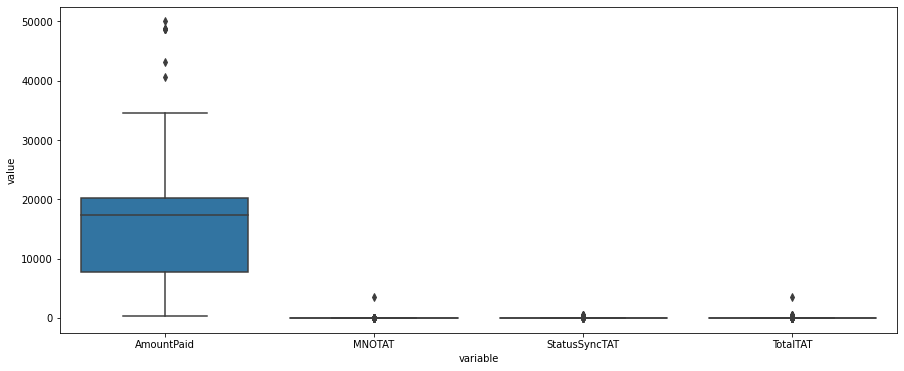

In [82]:

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df_plot = pd.DataFrame(data = numerical_variables_df, columns = numerical_variables_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df_plot))

plt.show()

#### Exploratory Data Analysis

In [83]:
df.head(2)

,ServiceName,ClientName,BeepTransactionID,CustomerMobileNumber,AmountPaid,DateCreated,StatusSynced,ManuallyReconciled,FinalStatus,MNOTAT,StatusSyncTAT,TotalTAT
0,Bolt Collections,TIGO TZ,25916854,891904920,17247,2022-04-21 00:03:47,NO,NO,SUCCESS,1.0,NaN,2.0
1,Bolt Collections,TIGO TZ,25916856,672727054,20697,2022-04-21 00:14:07,NO,NO,SUCCESS,1.0,NaN,2.0


In [84]:
df.columns

Index(['ServiceName', 'ClientName', 'BeepTransactionID',
       'CustomerMobileNumber', 'AmountPaid', 'DateCreated', 'StatusSynced',
       'ManuallyReconciled', 'FinalStatus', 'MNOTAT', 'StatusSyncTAT',
       'TotalTAT'],
      dtype='object')

In [85]:
df['StatusSynced'].value_counts(normalize = False)

NO     1498
YES     153
Name: StatusSynced, dtype: int64

Text(0.5, 1.0, 'countplot of Synced Status ')

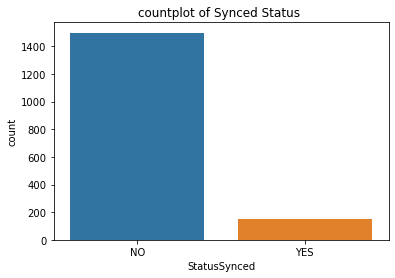

In [86]:
# plotting
sns.countplot(x = df['StatusSynced'])
plt.title('countplot of Synced Status ')

In [87]:
df['ManuallyReconciled'].value_counts(normalize = True)

NO    1.0
Name: ManuallyReconciled, dtype: float64

In [88]:
df['FinalStatus'].value_counts(normalize = True)

SUCCESS    0.995154
PENDING    0.003634
FAILED     0.001211
Name: FinalStatus, dtype: float64

Text(0.5, 1.0, 'countplot of Final status Status ')

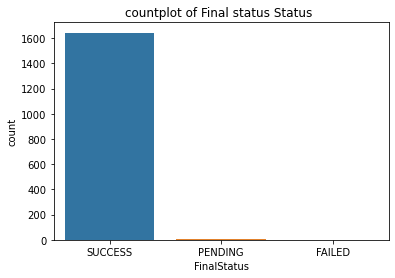

In [89]:
# plotting
sns.countplot(x = df['FinalStatus'])
plt.title('countplot of Final status Status ')

In [90]:
# Number of services
df['ServiceName'].nunique()

8

In [95]:
# Services count
df['ServiceName'].value_counts(normalize = False)

Bolt Collections          1492
Tigo Pesa B2C               32
Airtel Topup                31
Mpesa B2C                   24
ZANTELAIRTIMETZ             21
HalotelAirtime              21
AIRTEL B2C                  19
Selcom Airtime Service      11
Name: ServiceName, dtype: int64

Text(0.5, 1.0, 'countplot of service name')

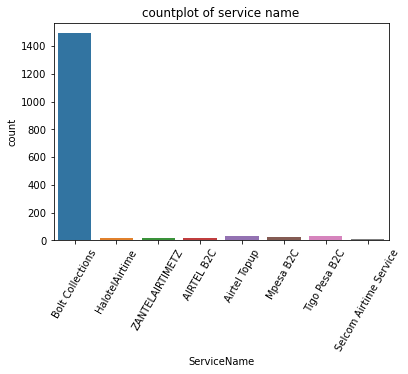

In [96]:
# plotting
sns.countplot(x = df['ServiceName'])
plt.xticks(rotation = 60)
plt.title('countplot of service name')

In [97]:
# Number of clients
df['ClientName'].nunique()

7

In [98]:
# client count
df_client_name = df['ClientName'].value_counts(normalize = False)
df_client_name

TIGO TZ                703
Airtel Tanzania        462
VodacomMula            327
Bolt (Taxify)           73
TRANSFER TO LIMITED     72
Tranglo                 12
Dusupay                  2
Name: ClientName, dtype: int64

Text(0.5, 1.0, 'countplot of client name')

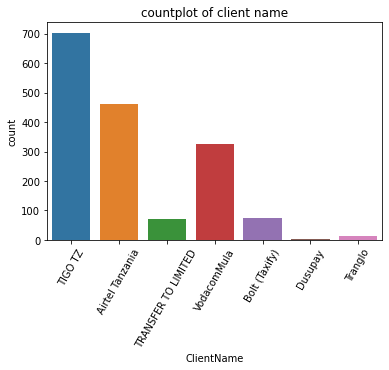

In [99]:
# Plotting
sns.countplot(x = df['ClientName'])
plt.xticks(rotation = 60)
plt.title('countplot of client name')

### Analysis by service name

In [100]:
df = df.drop(columns = ["BeepTransactionID","CustomerMobileNumber"])

In [101]:
services = df['ServiceName'].unique().tolist()

In [102]:
type(services)

list

In [107]:
def perform_service_analysis():
    for service in services:
        df_service = df.loc[df['ServiceName']== service]
        print("---------------------------------------------------------")
        print(service)
        desc_stats = df_service.describe()
        print("Descriptive Statistics\n", desc_stats)
        print("-------------------------------------------------------")
        status_synced = df_service['StatusSynced'].value_counts(normalize = False)
        print("Status Synced", status_synced)
        final_status = df_service['FinalStatus'].value_counts(normalize = False)
        print("Final Status: \n", final_status)
        manually_rec = df_service['ManuallyReconciled'].value_counts(normalize = False)
        print("Manually Reconciled \n",manually_rec)
        num_services = df_service['ServiceName'].value_counts()
        print("Total Services\n", num_services)
    

In [108]:
perform_service_analysis()

---------------------------------------------------------
Bolt Collections
Descriptive Statistics
          AmountPaid       MNOTAT  StatusSyncTAT     TotalTAT
count   1492.000000  1492.000000      63.000000  1492.000000
mean   14794.270777     3.766756      78.698413     7.643432
std     6581.220002    93.016484     147.236329    98.934858
min      256.000000     1.000000       1.000000     1.000000
25%     9273.500000     1.000000       1.000000     2.000000
50%    17846.500000     1.000000       1.000000     2.000000
75%    20168.000000     2.000000      46.000000     2.000000
max    26445.000000  3594.000000     531.000000  3595.000000
-------------------------------------------------------
Status Synced NO    1492
Name: StatusSynced, dtype: int64
Final Status: 
 SUCCESS    1491
FAILED        1
Name: FinalStatus, dtype: int64
Manually Reconciled 
 NO    1492
Name: ManuallyReconciled, dtype: int64
Total Services
 Bolt Collections    1492
Name: ServiceName, dtype: int64
-------------

#### Analysis by client name

In [109]:
clients = df['ClientName'].unique().tolist()
clients


['TIGO TZ',
 'Airtel Tanzania',
 'TRANSFER TO LIMITED',
 'VodacomMula',
 'Bolt (Taxify)',
 'Dusupay',
 'Tranglo']

In [110]:
type(clients)

list

In [111]:
def perfrom_client_analysis():
    for client in clients:
        df_client = df.loc[df['ClientName']== client]
        print("---------------------------------------------------------")
        print(client)
        desc_stats = df_client.describe()
        print("Descriptive Statistics\n", desc_stats)
        print("-------------------------------------------------------")
        status_synced = df_client['StatusSynced'].value_counts(normalize = False)
        print("Status Synced", status_synced)
        final_status = df_client['FinalStatus'].value_counts(normalize = False)
        print("Final Status: \n", final_status)
        manually_rec = df_client['ManuallyReconciled'].value_counts(normalize = False)
        print("Manually Reconciled \n",manually_rec)
        num_clients = df_client['ClientName'].value_counts()
        print("Total Clients\n", num_clients)
    

In [112]:
perfrom_client_analysis()

---------------------------------------------------------
TIGO TZ
Descriptive Statistics
          AmountPaid       MNOTAT  StatusSyncTAT     TotalTAT
count    703.000000   703.000000      39.000000   703.000000
mean   15383.140825     6.469417      68.820513    10.998578
std     6395.042157   135.504256     129.544114   139.573307
min     1050.000000     1.000000       1.000000     1.000000
25%    10384.000000     1.000000       1.000000     2.000000
50%    18429.000000     1.000000       1.000000     2.000000
75%    20253.000000     2.000000      72.500000     2.000000
max    26445.000000  3594.000000     531.000000  3595.000000
-------------------------------------------------------
Status Synced NO    703
Name: StatusSynced, dtype: int64
Final Status: 
 SUCCESS    702
FAILED       1
Name: FinalStatus, dtype: int64
Manually Reconciled 
 NO    703
Name: ManuallyReconciled, dtype: int64
Total Clients
 TIGO TZ    703
Name: ClientName, dtype: int64
--------------------------------------